# Evaluation of Binary Beat Estimation from Beats in 3/4 obtained by Beat Tracking Algorithms
by:

Jose R. Zapata and Antonio Escamilla

**Project ACMUS:**  https://acmus-mir.github.io/

## Installing libraries and import statements

In [ ]:
!python -m pip install madmom -q                                                # Package for beat analysis

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import re
import time
import matplotlib.pyplot as plt
import madmom
import madmom.evaluation.beats as be
plt.rcParams["figure.figsize"] =(12,6)

## Get Generated Beat Data, Audiofiles and Annotations

List txt files with the generated beat data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# Directory in GDrive where the generated predictions are saved
generated_beats_dir = '/content/gdrive/MyDrive/ACMus/Results/bambucos_generated_beats_compound/'             

In [ ]:
# Get the list of Files in Folder
import glob, os
import shutil

In [ ]:
# List all txt files in the folder
generated_beats_list = glob.glob(generated_beats_dir + '*.txt')

Download Audio Files and Annotations from Zenodo:

https://zenodo.org/record/3965447/files/rhythm_set.zip?download=1

In [ ]:
#Download files from Zenodo
!wget -O rhythm_set.zip https://zenodo.org/record/3965447/files/rhythm_set.zip?download=1

In [ ]:
#Unzip file
!unzip -q rhythm_set.zip -d ./rhythm_set

## Get bambucos information

In [ ]:
anotations_dir='./rhythm_set/Beat_annotations/'                                 # Anotation files folder

In [ ]:
bambuco_set = pd.DataFrame(columns=['sample_name','compound_ann', 'generated_beat_file'])

In [ ]:
sample_names_list = []
for file_name in generated_beats_list:
    sample_names_list.append(file_name.split('/')[-1][:-11])                    # Grab sample name from fullpath 

In [ ]:
bambuco_set['sample_name'] = sample_names_list
bambuco_set['compound_ann'] = bambuco_set['sample_name'].apply(lambda x: x)+'(1).txt'               # use sample name to complete file name for annotations   
bambuco_set['generated_beat_file'] = bambuco_set['sample_name'].apply(lambda x: x)+'_gen(1).txt'    # use sample name to complete file name for generated beats 
bambuco_set.reset_index(drop=True, inplace = True)
print(f'Number of Bambuco Files with generated beats= {len(bambuco_set)}')

Number of Bambuco Files with generated beats= 41


## Get Ground Truth

In [ ]:
def read_ann(file):
  '''
  function to read .txt annotations file
  returns numpy array
  '''
  beatsItt = list()

  if 'gen' in file:                                 # if the 'gen' characters are included in the file string
    dir = generated_beats_dir                       # use the generated beats folder
  else:
    dir = anotations_dir                            #if not, use the annotations folder

  
  with open(os.path.join(dir, file), 'r') as f:
    lines= [line.split() for line in f]
    for line in lines:
      beatsItt.append(np.float32(line[0]))
    beatsItt=np.asarray(beatsItt)
    return beatsItt

In [ ]:
bambuco_set['compound_gt'] = bambuco_set['compound_ann'].apply(read_ann)                        # read annotations in txt files and fill the data frame
bambuco_set['generated_beats'] = bambuco_set['generated_beat_file'].apply(read_ann)             # read generated beats in txt files and fill the data frame

In [ ]:
bambuco_set.head()

,sample_name,compound_ann,generated_beat_file,compound_gt,generated_beats
0,rh_0022,rh_0022(1).txt,rh_0022_gen(1).txt,"[0.82666665, 1.32, 1.7866666, 2.2866666, 2.714...","[0.36, 0.83, 1.31, 1.78, 2.25, 2.71, 3.175, 3...."
1,rh_0017,rh_0017(1).txt,rh_0017_gen(1).txt,"[0.010666667, 0.544, 1.0773333, 1.664, 2.22933...","[0.03, 0.59, 1.12, 1.6700001, 2.22, 2.7849998,..."
2,rh_0030,rh_0030(1).txt,rh_0030_gen(1).txt,"[0.32666665, 0.84466666, 1.3216667, 1.863, 2.2...","[0.33, 0.82000005, 1.32, 1.8, 2.29, 2.77, 3.25..."
3,rh_0040,rh_0040(1).txt,rh_0040_gen(1).txt,"[0.021333333, 0.49066666, 1.0746666, 1.6, 2.09...","[0.505, 1.03, 1.5550001, 2.07, 2.6, 3.11, 3.62..."
4,rh_0041,rh_0041(1).txt,rh_0041_gen(1).txt,"[0.34666666, 0.918, 1.4866667, 2.1233332, 2.70...","[0.36, 0.935, 1.52, 2.09, 2.67, 3.25, 3.8, 4.3..."


## Beat Evaluation


### Madmom Evaluation


In [ ]:
Rhythm_madmom = pd.DataFrame(columns=['sample_name'])               # create a new df with the 'sample name' 
Rhythm_madmom['sample_name'] = bambuco_set['sample_name']           # column from the 'bambuco_set' df

# Create columns by evaluation metrics
Rhythm_madmom['fmeasure']=''
Rhythm_madmom['amlc']=''
Rhythm_madmom['amlt']=''
Rhythm_madmom['cmlc']=''
Rhythm_madmom['cmlt']=''
Rhythm_madmom['Eval'] =''

In [ ]:
for n, file in bambuco_set.iterrows():
  Rhythm_madmom['Eval'][n] = be.BeatEvaluation(file['generated_beats'], file['compound_gt'])    # run madmom evaluation using generated beats and compound ground truth
  Rhythm_madmom['fmeasure'][n]= Rhythm_madmom['Eval'][n].fmeasure*100                           # fill in all evaluation metrics
  Rhythm_madmom['amlc'][n]= Rhythm_madmom['Eval'][n].amlc*100
  Rhythm_madmom['amlt'][n]= Rhythm_madmom['Eval'][n].amlt*100
  Rhythm_madmom['cmlc'][n]= Rhythm_madmom['Eval'][n].cmlc*100
  Rhythm_madmom['cmlt'][n]= Rhythm_madmom['Eval'][n].cmlt*100

In [ ]:
Rhythm_madmom[['fmeasure','amlc', 'amlt', 'cmlc', 'cmlt']] = Rhythm_madmom[['fmeasure', 'amlc', 'amlt', 'cmlc', 'cmlt']].apply(pd.to_numeric)

### Results


In [ ]:
colu = ['fmeasure', 'amlc', 'amlt', 'cmlc', 'cmlt']
display(Rhythm_madmom[colu])

,fmeasure,amlc,amlt,cmlc,cmlt
0,98.795181,97.619048,97.619048,97.619048,97.619048
1,97.142857,100.000000,100.000000,100.000000,100.000000
2,100.000000,90.909091,98.181818,90.909091,98.181818
3,99.082569,98.181818,98.181818,98.181818,98.181818
4,100.000000,100.000000,100.000000,100.000000,100.000000
5,98.412698,96.875000,96.875000,96.875000,96.875000
6,77.777778,78.947368,78.947368,78.947368,78.947368
7,100.000000,100.000000,100.000000,100.000000,100.000000
8,100.000000,100.000000,100.000000,100.000000,100.000000
9,91.891892,84.210526,84.210526,84.210526,84.210526


In [ ]:
Rhythm_madmom[colu].describe()

,fmeasure,amlc,amlt,cmlc,cmlt
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,92.135966,88.473307,91.598461,88.473307,91.598461
std,11.247544,16.287954,13.774359,16.287954,13.774359
min,52.459016,36.363636,36.363636,36.363636,36.363636
25%,91.891892,83.333333,93.750000,83.333333,93.750000
50%,96.842105,96.875000,96.875000,96.875000,96.875000
75%,98.795181,100.000000,100.000000,100.000000,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


#### Boxplot


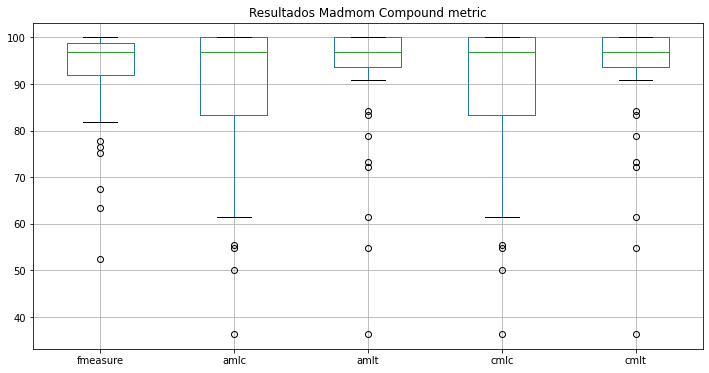

In [ ]:
plt.rcParams["figure.figsize"] =(12,6) 
Rhythm_madmom[colu].boxplot()
plt.title('Madmom Compound Metric Results');